Accuracy: 0.6264236902050114
Precision: 0.6643252508837878
Recall: 0.6264236902050114
F1 Score: 0.6350837970412571

Classification Report:
               precision    recall  f1-score   support

    ANDESITE       0.61      0.53      0.57        47
      BASALT       0.64      0.50      0.56       165
      DACITE       0.48      0.76      0.59        21
      GABBRO       0.25      0.09      0.13        22
   KOMATIITE       0.88      0.93      0.90        83
    RHYOLITE       0.94      0.87      0.90        68
   THOLEIITE       0.17      0.39      0.24        33

    accuracy                           0.63       439
   macro avg       0.57      0.58      0.56       439
weighted avg       0.66      0.63      0.64       439



<Figure size 1000x800 with 0 Axes>

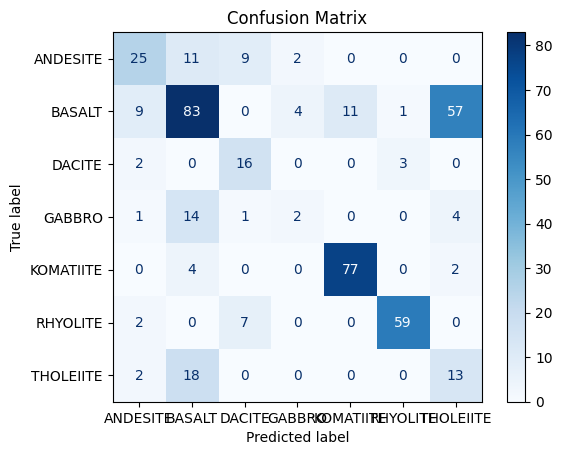

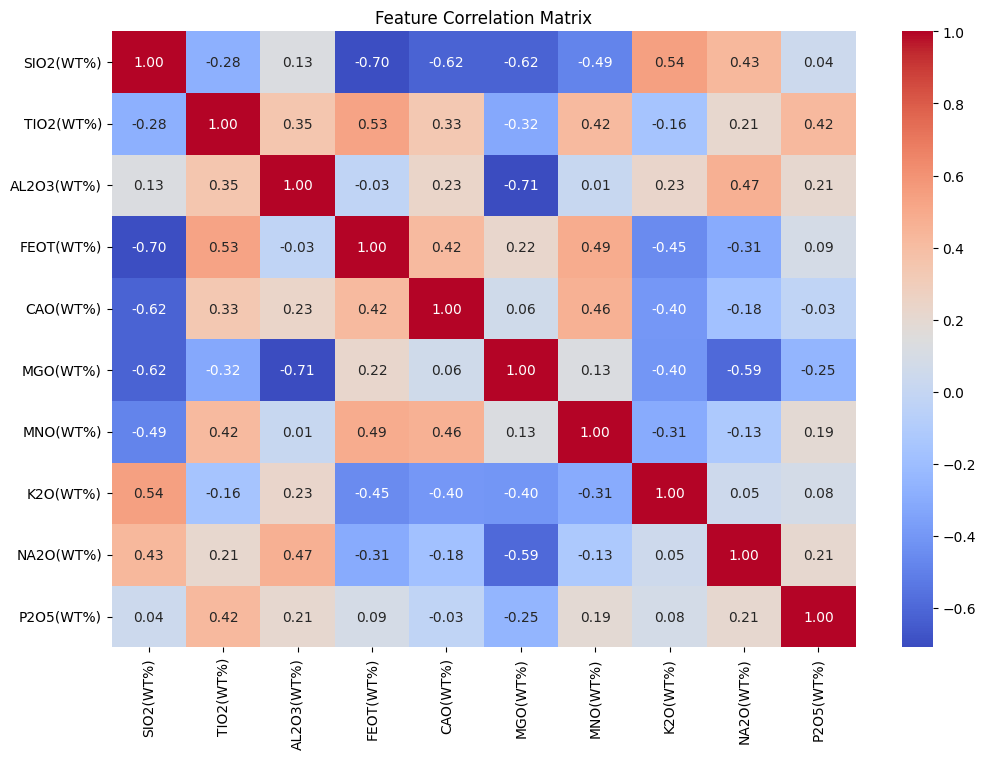

C:\Users\abhay\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


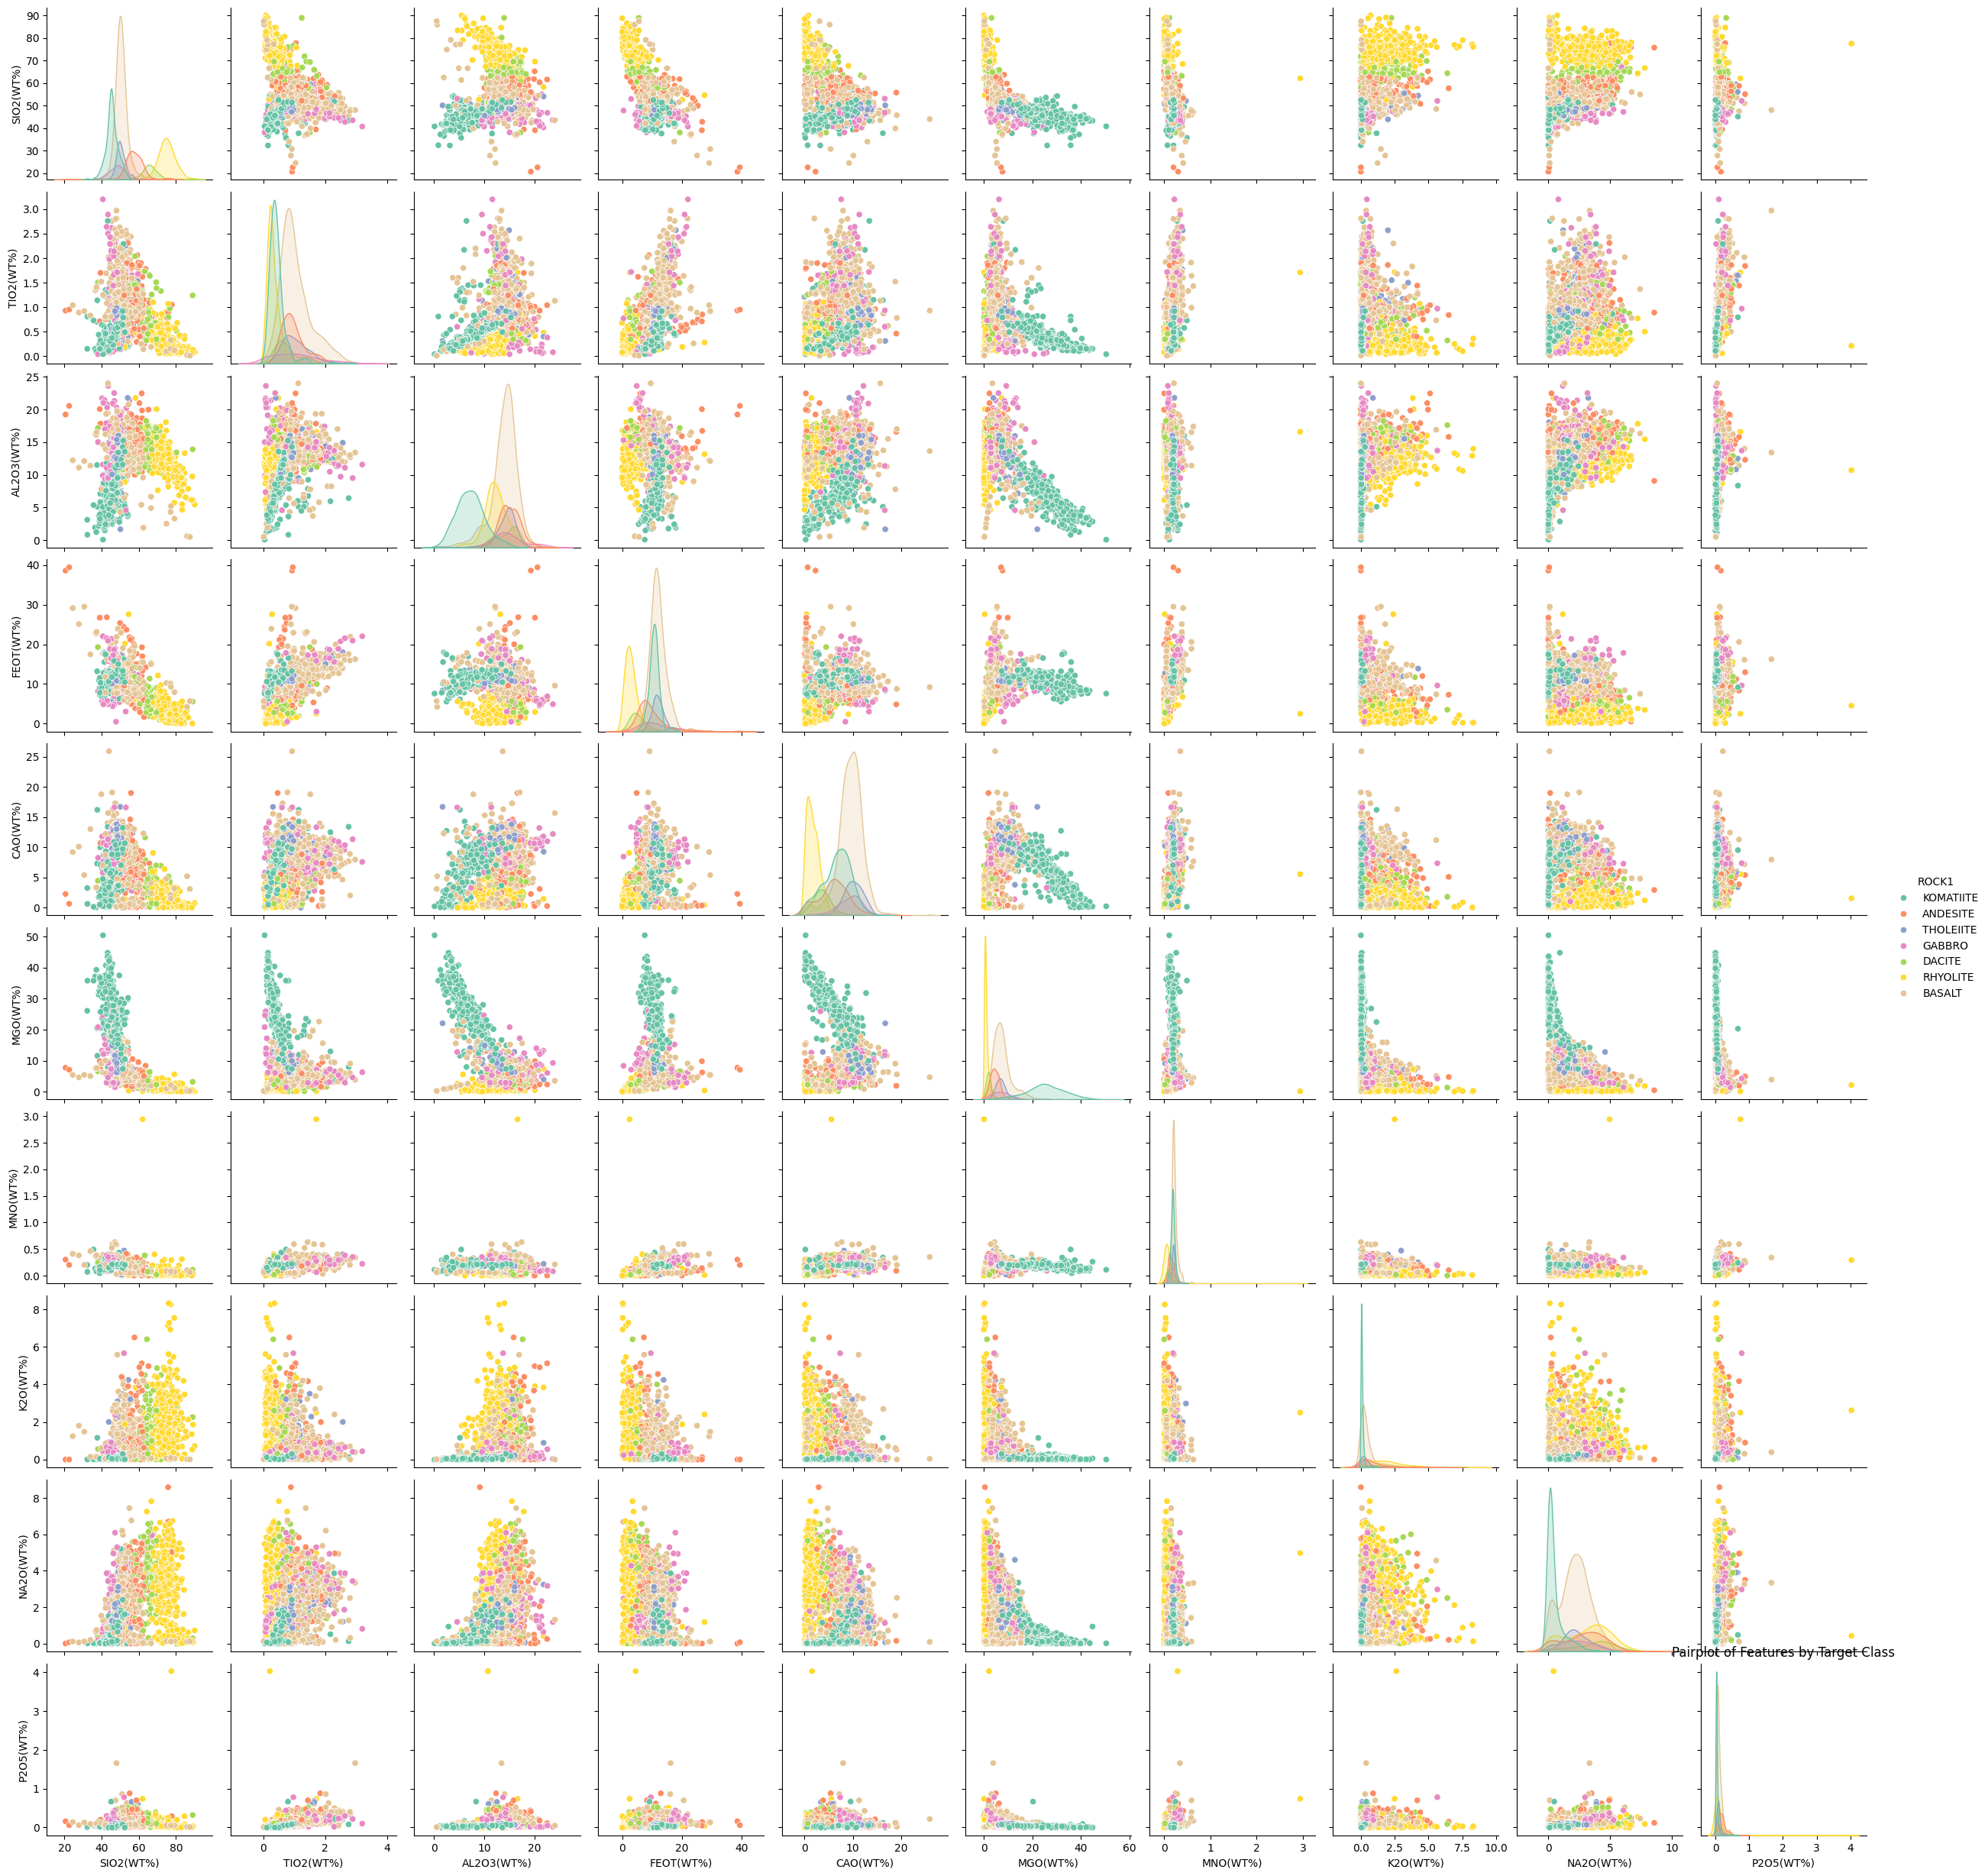

In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import (
    accuracy_score,
    classification_report,
    confusion_matrix,
    ConfusionMatrixDisplay,
    precision_score,
    recall_score,
    f1_score
)

# Load the dataset
file_path = '/mnt/data/multiclass_clean.csv'
data = pd.read_csv("multiclass_clean.csv")

# Separate features and target
X = data.drop(columns=["ROCK1"])
y = data["ROCK1"]

# Encode the target variable
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Handle missing values using mean imputation
imputer = SimpleImputer(strategy="mean")
X_imputed = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)

# Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X_imputed, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded
)

# Train a Gaussian Naive Bayes classifier
gnb_model = GaussianNB()
gnb_model.fit(X_train, y_train)

# Predict on the test set
y_pred = gnb_model.predict(X_test)

# Evaluate performance
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average="weighted", zero_division=0)
recall = recall_score(y_test, y_pred, average="weighted")
f1 = f1_score(y_test, y_pred, average="weighted")
report = classification_report(y_test, y_pred, target_names=label_encoder.classes_)
conf_matrix = confusion_matrix(y_test, y_pred)

# Display results
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("\nClassification Report:\n", report)

# Confusion Matrix
plt.figure(figsize=(10, 8))
ConfusionMatrixDisplay(conf_matrix, display_labels=label_encoder.classes_).plot(
    cmap="Blues", values_format="d"
)
plt.title("Confusion Matrix")
plt.show()

# Correlation Matrix for Features
correlation_matrix = X_imputed.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Feature Correlation Matrix")
plt.show()

# Pairplot for Visual Exploration
sns.pairplot(data, hue="ROCK1", palette="Set2")
plt.title("Pairplot of Features by Target Class")
plt.show()
